<a href="https://colab.research.google.com/github/bbberylll/ESAA_OB/blob/main/ESAA_OB_WEEK5_1_markdown.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

토픽 모델링: 문서 집합에 숨어 있는 주제를 찾아내는 것
- LSA(Latent Semantic Analysis)와 LDA(Latent Dirichlet Allocation)
    - 차원 축소의 LDA와 다른 알고리즘임 주의!!
    - 사이킷런은 LDA 기반의 토픽 모델링을 LatentDirichletAllocation 클 래스로 제공
    - fetch_20newsgroups() API는 categories 파라미터를 통해 필요한 주제만 필터링해 추출하고 추출된 텍스트를 Count 기반으로 벡터화 변환

코사인 유사도: 벡터와 벡터 간의 유사도를 비교할 때 벡터의 크기보다는 벡터의 상호 방향성이 얼마나 유사한지에 기반
- 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용
- 사잇각에 따른 상호 관계: 유사 벡터, 관련성이 없는 벡터, 반대 관계인 벡터
- 두 벡터의 내적 값

- 유사도 cos𝜭
    - 두 벡터의 내적을 총 벡터 크기의 합으로 나눈 것(즉, 내적 결과를 총 벡터 크기로 정규화한 것

- 유사도 비교에 많이 사용되는 이유:
    - 문서를 피처 벡터화 변환하면 희소 행렬이 되기 쉬움, 희소 행렬 기반 유사도 지표는 정확도가 떨어지기 쉬움
    - 문서가 매우 긴 경우 단어의 빈도수가 많아 빈도수 기반으로는 공정한 비교 불가능
    - cos_similarity() 함수 사용

한글 텍스트 처리
- 일반적으로 한글 언어 처리는 영어 등의 라틴어 처리보다 어려움
    - 주된 원인은 띄어쓰기와 다양한 조사
    - '조사'는 주어나 목적어를 위해 추가되며, 경우의 수가 많기 때문에 어근 추출(Stemming/Lemmatization) 등 전처리 시 제거하기 까다로움
- KoNLPy: 파이썬의 대표적인 한글 형태소 패키지
- 형태소 분석: 말뭉치를 형태소 어근 단위로 쪼개고 각 형태소에 품사 태깅을 부착하는 작업

### 토픽 모델링

In [ ]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

cats=['rec.motorcycles', 'rec.sport.baseball', 'comp.graphics', 'comp.windows.x',
        'talk.politics.mideast', 'soc.religion.christian', 'sci.electronics', 'sci.med']

news_df=fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'),
                        categories=cats, random_state=0)

count_vect=CountVectorizer(max_df=0.95, max_features=1000, min_df=2, stop_words='english',
                           ngram_range=(1,2))
feat_vect=count_vect.fit_transform(news_df.data)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (7862, 1000)


In [ ]:
lda=LatentDirichletAllocation(n_components=8, random_state=0)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=8, random_state=0)

In [ ]:
print(lda.components_.shape)
lda.components_

(8, 1000)


array([[2.69030238e+02, 1.87798026e+02, 7.09003824e+01, ...,
        1.22710343e+01, 1.06329639e+02, 7.25995512e+01],
       [1.25091799e-01, 2.46049106e+00, 1.25051902e-01, ...,
        2.80071176e+02, 1.25089783e-01, 5.05669662e+01],
       [1.33978420e+02, 1.25042012e-01, 9.98277256e+01, ...,
        1.25092219e-01, 3.31078261e+01, 1.25028398e-01],
       ...,
       [2.98813886e+01, 1.88071366e+01, 1.14748730e+01, ...,
        1.93022584e+01, 5.29368271e+00, 1.44478198e+01],
       [1.25074899e-01, 1.25105300e-01, 1.25004235e-01, ...,
        1.03576436e+02, 1.25100535e-01, 7.22276359e+01],
       [1.25172284e-01, 1.03967760e+00, 1.25221075e-01, ...,
        5.31740996e+01, 1.25025929e-01, 1.25062991e-01]])

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        topic_word_indexes=topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:no_top_words]

        feature_concat=' '.join([feature_names[i] for i in top_indexes])
        print(feature_concat)

feature_names=count_vect.get_feature_names_out()

display_topics(lda, feature_names, 15)

Topic # 0
10 year medical health 1993 20 12 disease cancer team patients research number new 11
Topic # 1
don just like know think good time ve does way really people want ll right
Topic # 2
image file jpeg output program gif images format files color entry use bit 03 02
Topic # 3
armenian armenians turkish people said turkey armenia government genocide turks muslim russian greek azerbaijan killed
Topic # 4
israel jews dos jewish israeli dos dos arab state people arabs palestinian adl ed anti peace
Topic # 5
edu com available graphics ftp window use mail data motif software version pub information server
Topic # 6
god people jesus church believe say christ does christian think christians did know bible man
Topic # 7
thanks use using does help like display need problem know server screen windows window program


### 문서 유사도

In [ ]:
import numpy as np

def cos_similarity(v1, v2):
    dot_product=np.dot(v1, v2)
    l2_norm=(np.sqrt(sum(np.square(v1)))*np.sqrt(sum(np.square(v2))))
    similarity=dot_product/l2_norm

    return similarity

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

doc_list=['if you take the blue pill, the story ends',
          'if you take the red pill, you stay in Wonderland',
          'if you take the red pill, I show you how deep the rabbit hole goes']
tfidf_vect_simple=TfidfVectorizer()
feature_vect_simple=tfidf_vect_simple.fit_transform(doc_list)
print(feature_vect_simple.shape)

(3, 18)


In [ ]:
feature_vect_dense=feature_vect_simple.todense()

vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect2=np.array(feature_vect_dense[1]).reshape(-1,)

similarity_simple=cos_similarity(vect1, vect2)
print('문장 1, 문장 2 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 2 Cosine 유사도: 0.402


In [ ]:
vect1=np.array(feature_vect_dense[0]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple=cos_similarity(vect1, vect3)
print('문장 1, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

vect2=np.array(feature_vect_dense[1]).reshape(-1,)
vect3=np.array(feature_vect_dense[2]).reshape(-1,)
similarity_simple=cos_similarity(vect2, vect3)
print('문장 2, 문장 3 Cosine 유사도: {0:.3f}'.format(similarity_simple))

문장 1, 문장 3 Cosine 유사도: 0.404
문장 2, 문장 3 Cosine 유사도: 0.456


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair=cosine_similarity(feature_vect_simple[0], feature_vect_simple)
print(similarity_simple_pair)

[[1.         0.40207758 0.40425045]]


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_simple_pair=cosine_similarity(feature_vect_simple[0], feature_vect_simple[1:])
print(similarity_simple_pair)

[[0.40207758 0.40425045]]


In [ ]:
similarity_simple_pair=cosine_similarity(feature_vect_simple, feature_vect_simple)
print(similarity_simple_pair)
print('shape:', similarity_simple_pair.shape)

[[1.         0.40207758 0.40425045]
 [0.40207758 1.         0.45647296]
 [0.40425045 0.45647296 1.        ]]
shape: (3, 3)


- Opinion Review 데이터 세트를 이용한 문서 유사도 측정

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def LemNormalize(text):
    lemmatizer=WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text)]

In [ ]:
import pandas as pd
import glob, os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

path=r'/content/drive/MyDrive/topics'
all_files=glob.glob(os.path.join(path, "*.data"))
filename_list=[]
opinion_text=[]

for file_ in all_files:
    df=pd.read_table(file_, index_col=None, header=0, encoding='latin1')
    filename_=file_.split('\\')[-1]
    filename=filename_.split('.')[0]
    filename_list.append(filename)
    opinion_text.append(df.to_string())

document_df=pd.DataFrame({'filename':filename_list, 'opinion_text':opinion_text})

tfidf_vect=TfidfVectorizer(tokenizer=LemNormalize, stop_words='english',
                            ngram_range=(1,2), min_df=0.05, max_df=0.85)
feature_vect=tfidf_vect.fit_transform(document_df['opinion_text'])

km_cluster=KMeans(n_clusters=3, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)
cluster_label=km_cluster.labels_
cluster_centers=km_cluster.cluster_centers_
document_df['cluster_label']=cluster_label

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

hotel_indexes=document_df[document_df['cluster_label']==2].index
print('호텔로 클러스터링 된 문서들의 DataFrame Index:', hotel_indexes)

comparison_docname=document_df.iloc[hotel_indexes[0]]['filename']
print('##### 비교 기준 문서명', comparison_docname,' 와 타 문서 유사도######')

similarity_pair=cosine_similarity(feature_vect[hotel_indexes[0]], feature_vect[hotel_indexes])
print(similarity_pair)

호텔로 클러스터링 된 문서들의 DataFrame Index: Index([2, 5, 7, 11, 12, 14, 21, 22, 26, 28, 34, 41, 42, 44, 47, 50], dtype='int64')
##### 비교 기준 문서명 /content/drive/MyDrive/topics/staff_bestwestern_hotel_sfo  와 타 문서 유사도######
[[1.         0.9382141  0.22876506 0.28746852 0.17150262 0.2458991
  0.32211102 0.24720885 0.09839206 0.24074081 0.08044352 0.15599081
  0.23007165 0.08770447 0.14144968 0.12259443]]


가장 유사도가 큰 파일명 및 유사도:
 filename      /content/drive/MyDrive/topics/staff_swissotel_...
similarity                                             0.938214
Name: 5, dtype: object


Text(0.5, 1.0, '/content/drive/MyDrive/topics/staff_bestwestern_hotel_sfo')

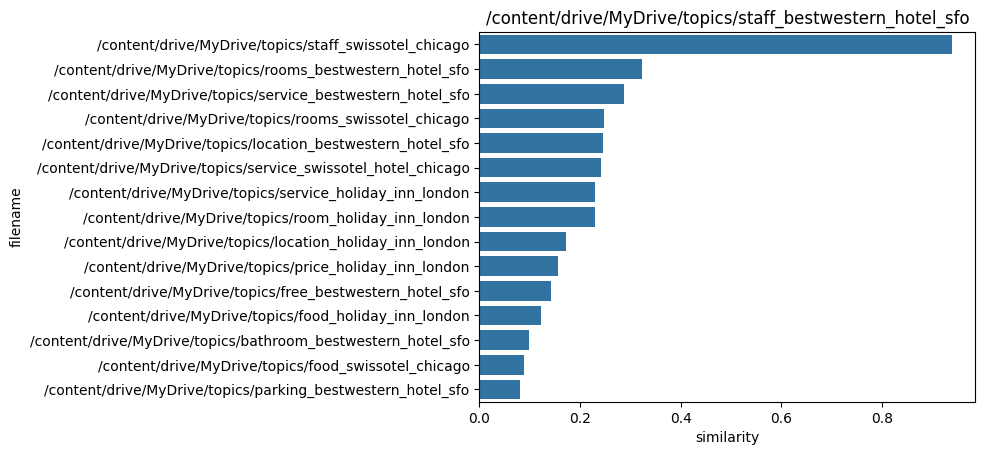

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

sorted_index=similarity_pair.argsort()[:,::-1]
sorted_index=sorted_index[:, 1:]

hotel_sorted_indexes=hotel_indexes[sorted_index.reshape(-1)]

hotel_1_sim_value=np.sort(similarity_pair.reshape(-1))[::-1]
hotel_1_sim_value=hotel_1_sim_value[1:]

hotel_1_sim_df=pd.DataFrame()
hotel_1_sim_df['filename']=document_df.iloc[hotel_sorted_indexes]['filename']
hotel_1_sim_df['similarity']=hotel_1_sim_value
print('가장 유사도가 큰 파일명 및 유사도:\n', hotel_1_sim_df.iloc[0, :])

sns.barplot(x='similarity', y='filename', data=hotel_1_sim_df)
plt.title(comparison_docname)

### 한글 텍스트 처리

(559~561 코드 생략)

In [ ]:
!pip install konlpy

In [ ]:
import pandas as pd

train_df=pd.read_csv('ratings_train.txt', sep='\t', encoding='utf-8')
train_df.head(3)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0


In [ ]:
train_df['label'].value_counts()

,count
label,
0,75173
1,74827


In [ ]:
import re

train_df=train_df.fillna(' ')
train_df['document']=train_df['document'].apply(lambda x:re.sub(r"\d+", " ", x))

test_df=pd.read_csv('ratings_test.txt', sep='\t', encoding='utf-8')
test_df=test_df.fillna(' ')
test_df['document']=test_df['document'].apply(lambda x:re.sub(r"\d+", " ", x))

train_df.drop('id', axis=1, inplace=True)
test_df.drop('id', axis=1, inplace=True)

In [ ]:
from konlpy.tag import Twitter

twitter=Twitter()
def tw_tokenizer(text):
    tokens_ko=twitter.morphs(text)
    return tokens_ko

/usr/local/lib/python3.12/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

tfidf_vect=TfidfVectorizer(tokenizer=tw_tokenizer, ngram_range=(1,2), min_df=3, max_df=0.9)
tfidf_vect.fit(train_df['document'])
tfidf_matrix_train=tfidf_vect.transform(train_df['document'])

/usr/local/lib/python3.12/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
lg_clf=LogisticRegression(random_state=0, solver='liblinear')

params={'C': [1 ,3.5, 4.5, 5.5, 10]}
grid_cv=GridSearchCV(lg_clf , param_grid=params, cv=3 ,scoring='accuracy', verbose=1)
grid_cv.fit(tfidf_matrix_train, train_df['label'])
print(grid_cv.best_params_ , round(grid_cv.best_score_,4))

Fitting 3 folds for each of 5 candidates, totalling 15 fits
{'C': 3.5} 0.8593


In [ ]:
from sklearn.metrics import accuracy_score

tfidf_matrix_test=tfidf_vect.transform(test_df['document'])

best_estimator=grid_cv.best_estimator_
preds=best_estimator.predict(tfidf_matrix_test)

print('Logistic Regression 정확도: ', accuracy_score(test_df['label'], preds))

Logistic Regression 정확도:  0.86172
